# Resolução das pricipais Equações Diferenciais Parciais (EDPs) da Física
# Equação do Calor
## Utilizando Fast Fourier Transform, Scipy e Numpy

## Baseado no exposto pelo livro "Data Driven Engineering"
## Autor: Kevin Pergher, Métodos Computacionais da Física C, 2021/01

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import axes3d

### Inicializando o domínio e as condições de contorno do problema, i.e.
### $ -50 \le x < 50 $

In [60]:
plt.rcParams['figure.figsize'] = [12, 12]
plt.rcParams.update({'font.size': 18})

alpha = 1    # Constante de Difusividade Térmica
L = 100      # Limite do nosso domínio
N = 2000     # Número de pontos (Discretização)
dx = L/N
x = np.arange(-L/2,L/2,dx)     # Definição de "X" como domínio nos reais
print(x)

[-50.   -49.95 -49.9  ...  49.85  49.9   49.95]


### Inicializando o equivalente de nosso domínio na frequência
### $\kappa \xrightarrow{F} x$
### Leia a DOC em: https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html

In [61]:
kappa = 2*np.pi*np.fft.fftfreq(N, d=dx)
print(kappa)

[ 0.          0.06283185  0.12566371 ... -0.18849556 -0.12566371
 -0.06283185]


### Definição da função distribuição inicial do calor
### $u(x, 0) = 1,\hspace{0.1cm} \forall \hspace{0.1cm}-10 \le x \le 10$
### $u(x, 0) = 0,\hspace{0.1cm} \forall \hspace{0.1cm}x < -10 \lor x > 10$

In [62]:
u0 = np.zeros_like(x)               # Domínio zerado
u0[int((L/2-L/10)/dx):int((L/2+L/10)/dx)] = 1
print(u0)

[0. 0. 0. ... 0. 0. 0.]


### Aplicação do Fast Fourier Transform (FFT) nas condições iniciais
### $u(x, 0) \xrightarrow{F} \hat u(x, 0)$
### Leia a DOC: https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html

In [63]:
u0_hat = np.fft.fft(u0)
u0_hat_ri = np.concatenate((u0_hat.real,u0_hat.imag))
print(u0_hat)

[ 400.        +0.j         -374.19540575-0.58778525j
  302.72969551+0.95105652j ... -201.81896705+0.95105652j
  302.72969551-0.95105652j -374.19540575+0.58778525j]


### Inicializando o domínio temporal e o "dt" para o qual vamos trabalhar

In [64]:
dt = 0.1
t = np.arange(0,10,dt)

### Vamos agora calcular a derivada segunda da função u(x, t), para tal usaremos as propriedades da Transformada de Fourier
### $\hat u(\kappa, t) \equiv F(u(x, t))$
### $F(\frac{d}{dx}u(x, t)) = -i \kappa F(u(x, t))$
### $F(\frac{d^{2}}{dx^{2}}u(x,t)) = -\kappa^{2} F(u(x, t))$

In [65]:
def rhsHeat(uhat_ri, t, kappa, alpha):
    uhat = uhat_ri[:N] + (1j) * uhat_ri[N:]
    d_uhat = -np.power(alpha,2) * np.power(kappa,2) * uhat
    d_uhat_ri = np.concatenate((d_uhat.real,d_uhat.imag)).astype('float64')
    return d_uhat_ri

### Resolução da Equação Diferencial Ordinária (EDO)
### Leia a DOC: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

In [66]:
u_hat_ri = odeint(rhsHeat, u0_hat_ri, t, args=(kappa,alpha))
print(u_hat_ri)

[[ 400.         -374.19540575  302.72969551 ...    0.95105652
    -0.95105652    0.58778525]
 [ 400.         -374.04770848  302.25202119 ...    0.94768335
    -0.94955585    0.58755325]
 [ 400.         -373.90006951  301.77510059 ...    0.94432216
    -0.94805756    0.58732134]
 ...
 [ 400.         -360.1368403   259.73556429 ...    0.67379567
    -0.81598603    0.56570209]
 [ 400.         -359.99469203  259.32573    ...    0.67140588
    -0.81469849    0.56547881]
 [ 400.         -359.85259988  258.91654239 ...    0.66902457
    -0.81341298    0.56525561]]


In [67]:
u_hat = u_hat_ri[:,:N] + (1j) * u_hat_ri[:,N:]
print(u_hat)

[[ 400.        +0.j         -374.19540575-0.58778525j
   302.72969551+0.95105652j ... -201.81896705+0.95105652j
   302.72969551-0.95105652j -374.19540575+0.58778525j]
 [ 400.        +0.j         -374.04770848-0.58755325j
   302.25202119+0.94955585j ... -201.10316504+0.94768335j
   302.25202119-0.94955585j -374.04770848+0.58755325j]
 [ 400.        +0.j         -373.90006951-0.58732134j
   301.77510059+0.94805756j ... -200.38990179+0.94432216j
   301.77510059-0.94805756j -373.90006951+0.58732134j]
 ...
 [ 400.        +0.j         -360.1368403 -0.56570209j
   259.73556429+0.81598603j ... -142.98282343+0.67379567j
   259.73556429-0.81598603j -360.1368403 +0.56570209j]
 [ 400.        +0.j         -359.99469203-0.56547881j
   259.32573   +0.81469849j ... -142.47569868+0.67140588j
   259.32573   -0.81469849j -359.99469203+0.56547881j]
 [ 400.        +0.j         -359.85259988-0.56525561j
   258.91654239+0.81341298j ... -141.97037258+0.66902457j
   258.91654239-0.81341298j -359.85259988+0.5652

In [68]:
u = np.zeros_like(u_hat)
print(u)

[[0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 ...
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j ... 0.+0.j 0.+0.j 0.+0.j]]


### Aplicando-se agora a Transformada Inversa de Fourier 
### Leia a DOC: https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft.html

In [70]:
for k in range(len(t)):
    u[k,:] = np.fft.ifft(u_hat[k,:])
u = u.real
print(u)

[[ 5.68434189e-17  1.42108547e-16  2.84217094e-17 ... -1.27897692e-16
  -4.26325641e-17 -9.94759830e-17]
 [-4.26325641e-16 -9.23705556e-16  8.52651283e-17 ...  1.13686838e-16
  -4.26325641e-16 -4.83169060e-16]
 [-1.26476607e-15 -1.20792265e-15 -1.27897692e-15 ... -1.22213351e-15
  -1.30739863e-15 -1.33582034e-15]
 ...
 [-3.26849658e-16 -3.69482223e-16 -2.70006240e-16 ... -3.12638804e-16
  -3.41060513e-16 -3.69482223e-16]
 [-3.12638804e-16 -3.97903932e-16 -3.69482223e-16 ... -2.55795385e-16
  -2.84217094e-16 -2.84217094e-16]
 [-2.41584530e-16 -3.41060513e-16 -2.98427949e-16 ... -2.84217094e-16
  -1.42108547e-16 -1.98951966e-16]]


<ipython-input-70-26fae92da41b>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  u[k,:] = np.fft.ifft(u_hat[k,:])


### Plotando a evolução da função u(x, t)

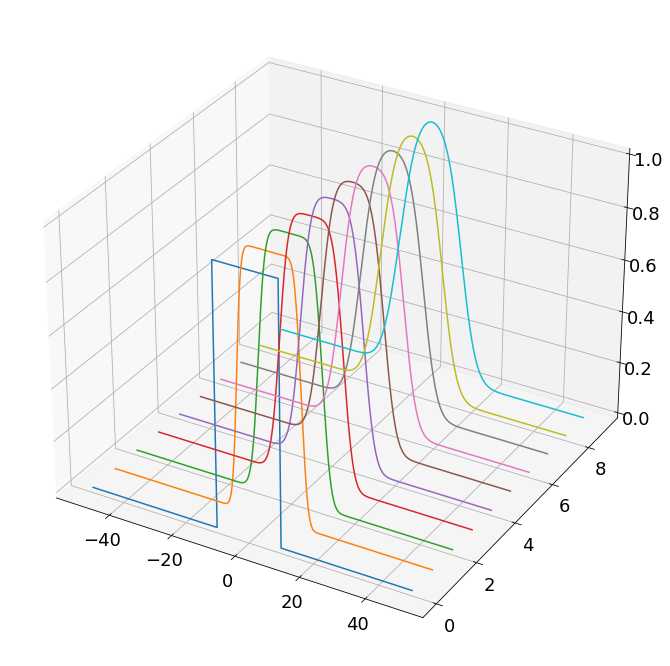

In [71]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
u_plot = u[0:-1:10,:]
for j in range(u_plot.shape[0]):
    ys = j*np.ones(u_plot.shape[1])
    ax.plot(x, ys, u_plot[j,:])